In [1]:
from IPython.display import Image, display

In [ ]:
import ifcopenshell
import ifcopenshell.geom
import OCC
import OCC.BRepGProp
import OCC.BRepBndLib
from OCC.BRepBndLib import brepbndlib_Add


#Specify to return pythonOCC shapes from ifcopenshell.geom.create_shape()
settings = ifcopenshell.geom.settings()
settings.set(settings.USE_PYTHON_OPENCASCADE, True)

# Initialize a graphical display window
occ_display = ifcopenshell.geom.utils.initialize_display()

# Open the IFC file using IfcOpenShell
ifc_file = ifcopenshell.open("house.ifc")
# Display the geometrical contents of the file using Python OpenCascade
products = ifc_file.by_type("IfcProduct")
for product in products:
    if product.is_a("IfcOpeningElement"): continue
    if product.Representation:
        shape = ifcopenshell.geom.create_shape(settings, product).geometry
        display_shape = ifcopenshell.geom.utils.display_shape(shape)
        if product.is_a("IfcPlate"):
            # Plates are the transparent parts of the window assembly
            # in the IfcOpenHouse model
            ifcopenshell.geom.utils.set_shape_transparency(display_shape, 0.8)
            


INFO:OCC.Display.backend:The qt-pyqt5 backend is already loaded...``load_backend`` can only be called once per session
INFO:OCC.Display.SimpleGui:GUI backend set to: qt-pyqt5


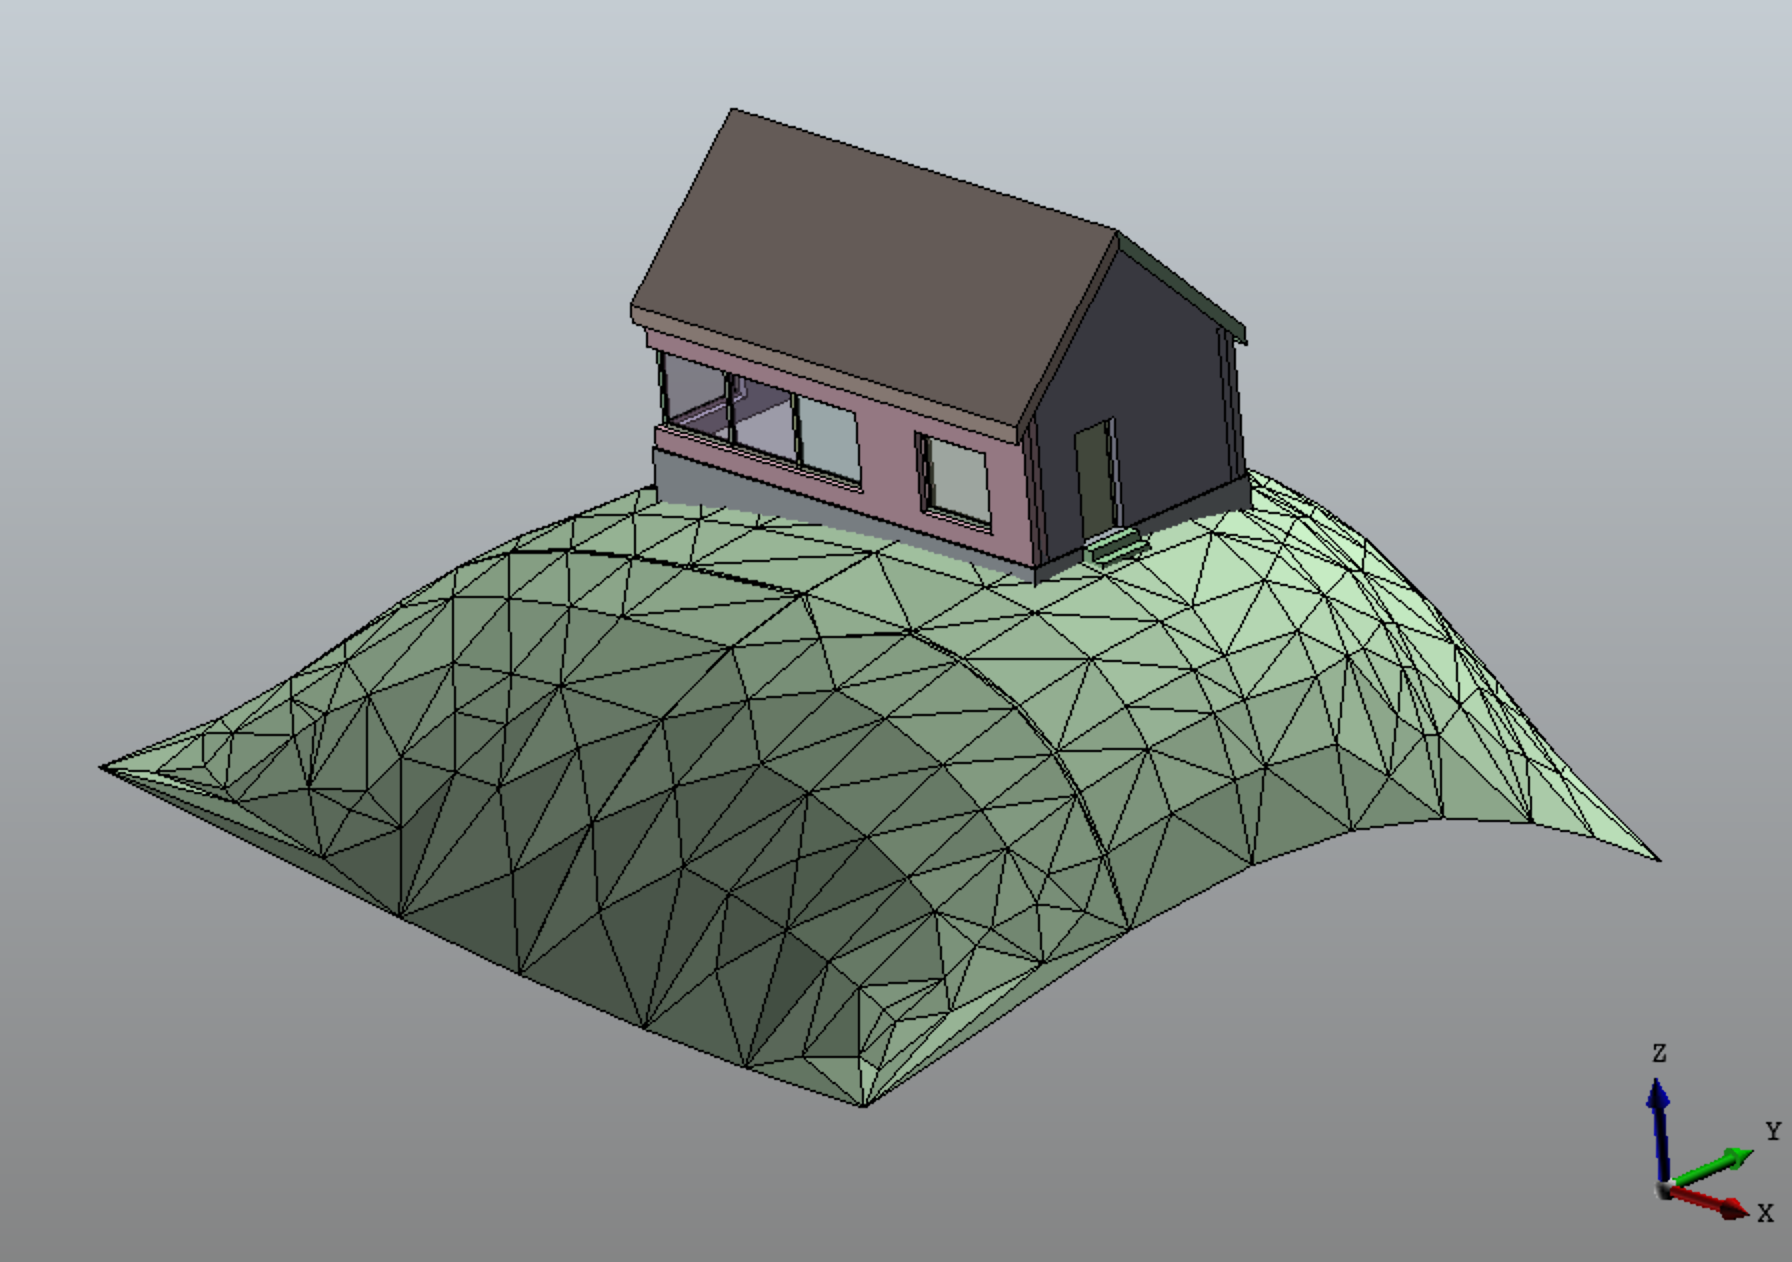

In [3]:
display(Image(filename='houseimage.png'))

In [ ]:
# Get a list of all walls in the file
walls = ifc_file.by_type("IfcWall")

# Create a list of wall representation shapes
# and compute the bounding box of these shapes
wall_shapes = []
bbox = OCC.Bnd.Bnd_Box()
for wall in walls:
    shape = ifcopenshell.geom.create_shape(settings, wall).geometry
    
    wall_shapes.append((wall, shape))
    OCC.BRepBndLib.brepbndlib_Add(shape, bbox)   
    
    ifcopenshell.geom.utils.display_shape(shape)
    
# Calculate the center/average of the bounding box
bounding_box_center = ifcopenshell.geom.utils.get_bounding_box_center(bbox)
print("Bounding box center: %.2f %.2f %.2f" % (
    bounding_box_center.X(), 
    bounding_box_center.Y(),
    bounding_box_center.Z()))

occ_display.DisplayMessage(bounding_box_center, "Center", update=True)

In [ ]:
occ_display.FitAll()
ifcopenshell.geom.utils.main_loop()

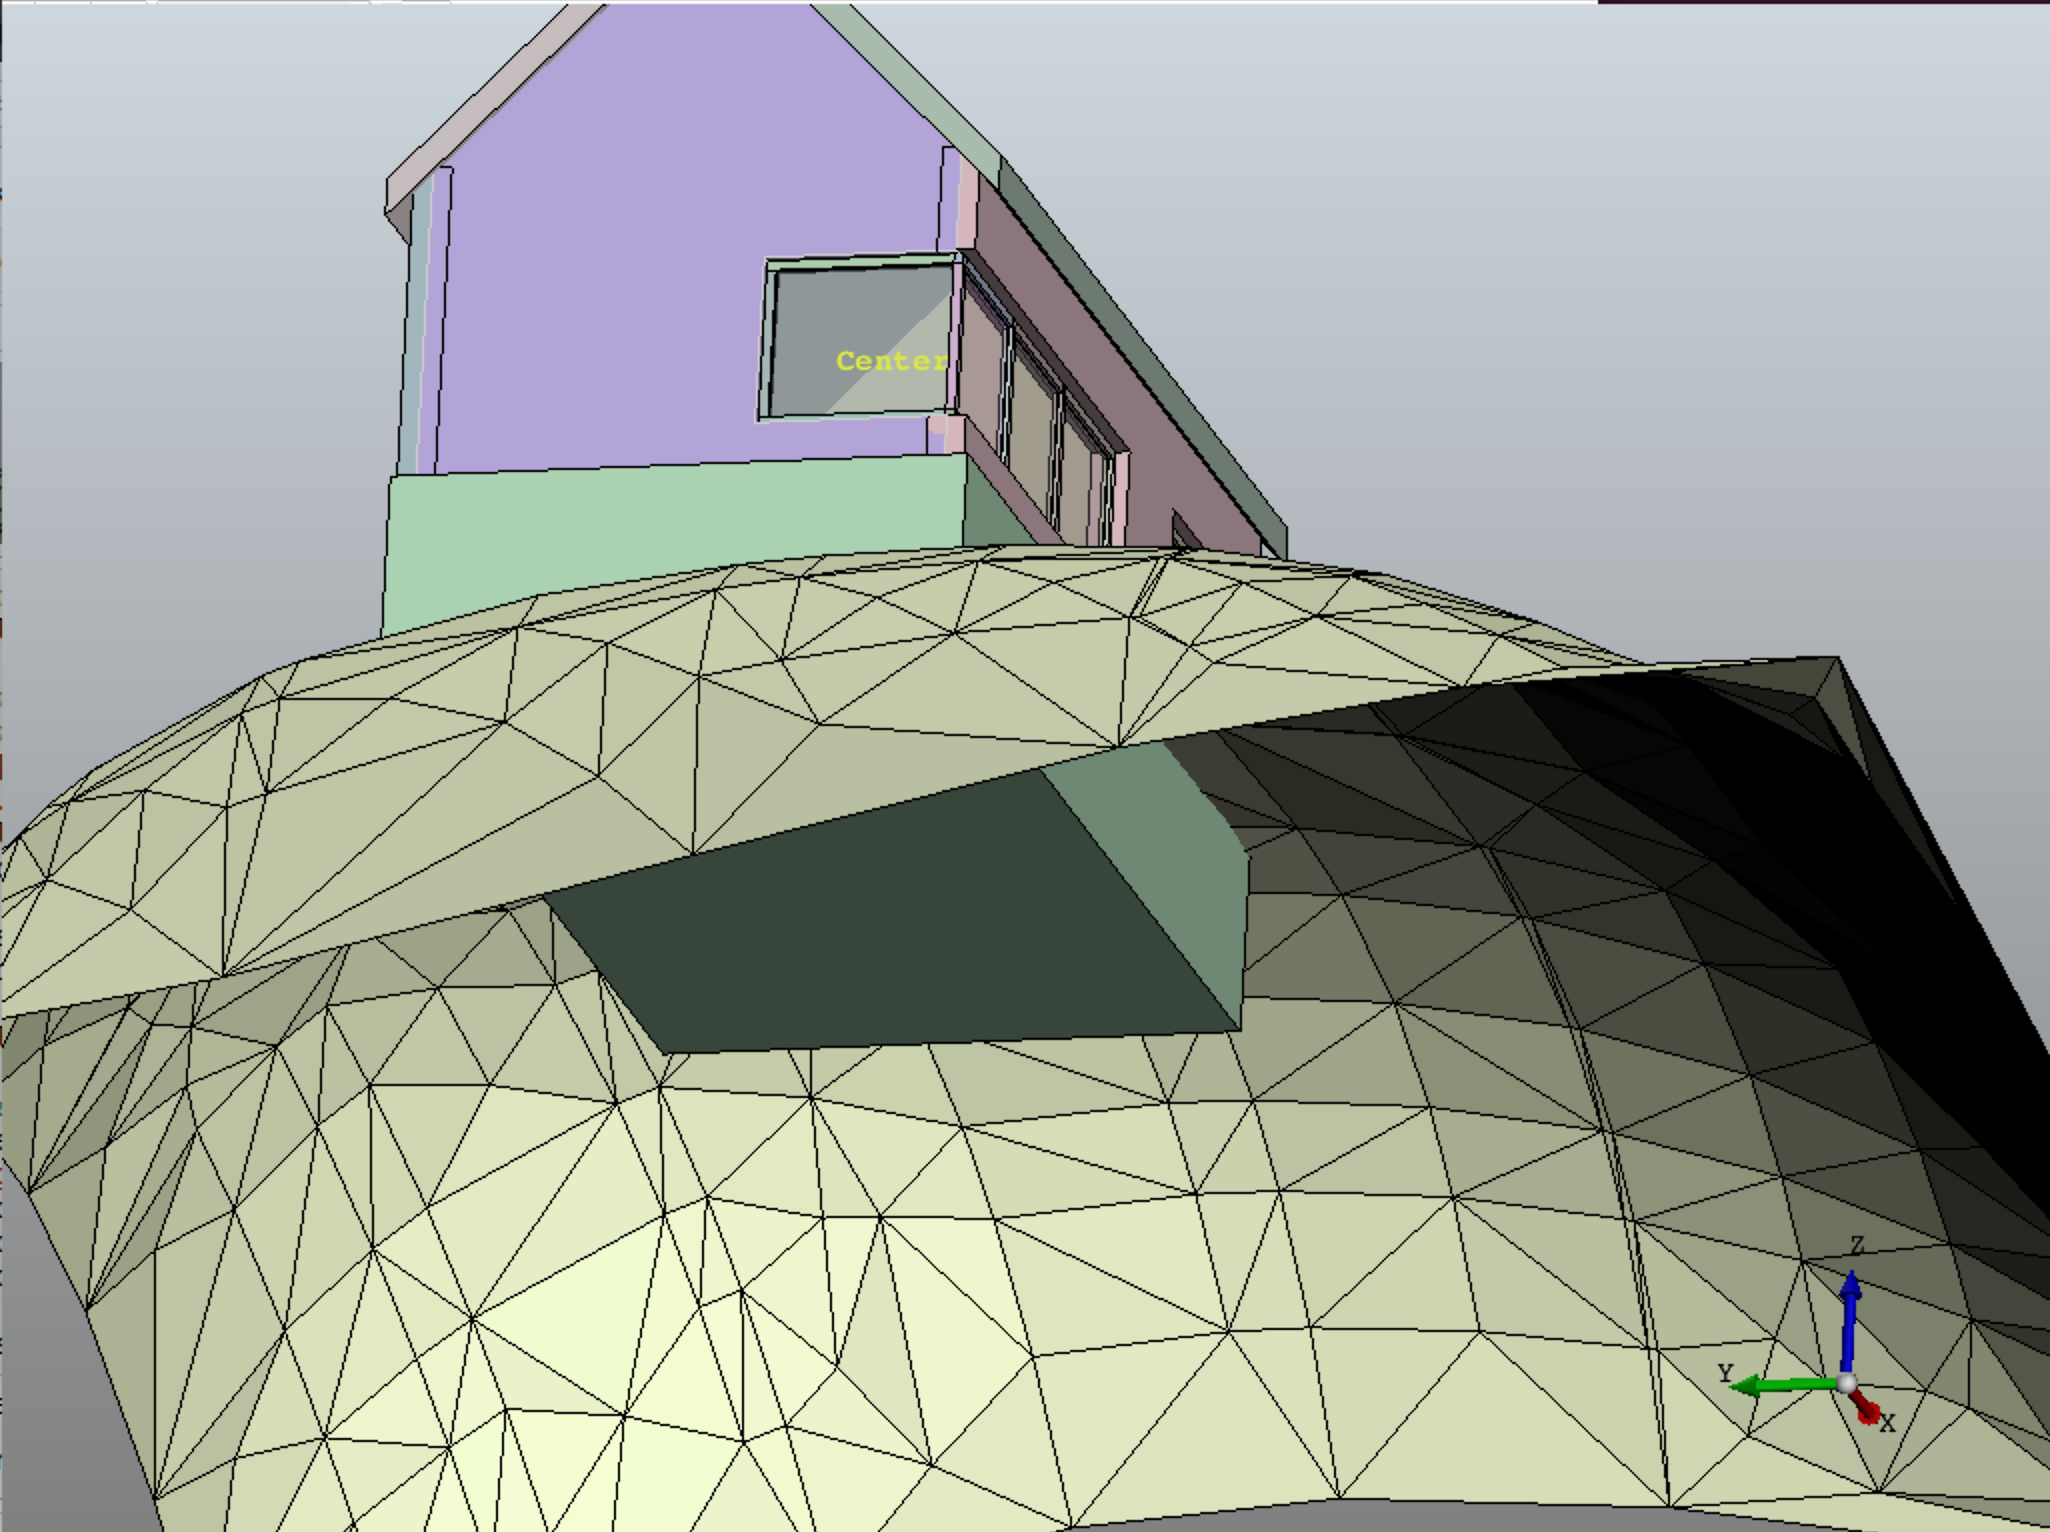

In [2]:
display(Image(filename='houseimage2.png'))